# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train_type = app_train.dtypes.reset_index()
app_train_type.columns=['count','type']
typeCount = app_train_type.groupby('type').aggregate('count').reset_index()
typeCount

,type,count
0,int64,41
1,float64,65
2,object,16


In [6]:
int_col=[]
float_col=[]
object_col=[]
for types, cols in zip(app_train.dtypes ,app_train.columns):
    if types == 'int64':
        int_col.append(cols)
    elif types == 'float64':
        float_col.append(cols)
    else:
        object_col.append(cols)

In [7]:
app_train[float_col].mean()

AMT_INCOME_TOTAL              168797.919297
AMT_CREDIT                    599025.999706
AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
REGION_POPULATION_RELATIVE         0.020868
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Length: 65, dtype: float64

In [8]:
app_train['AMT_INCOME_TOTAL'].std()

237123.14627885626

<AxesSubplot:>

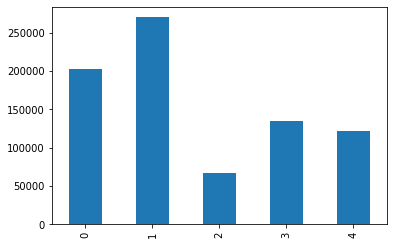

In [10]:
df = app_train['AMT_INCOME_TOTAL'].head()
plt.figure()
df.plot(kind='bar')